In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análise dos dados

Essa seção visa entender os tipos de dados que o problema apresenta bem como ter alguma análise descritiva prévia

In [3]:
# Importa dados de treino
raw_data = pd.read_csv('train.csv')
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])
raw_data = raw_data.set_index('datetime')
print(raw_data.info())
print(raw_data.nunique())
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB
None
season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


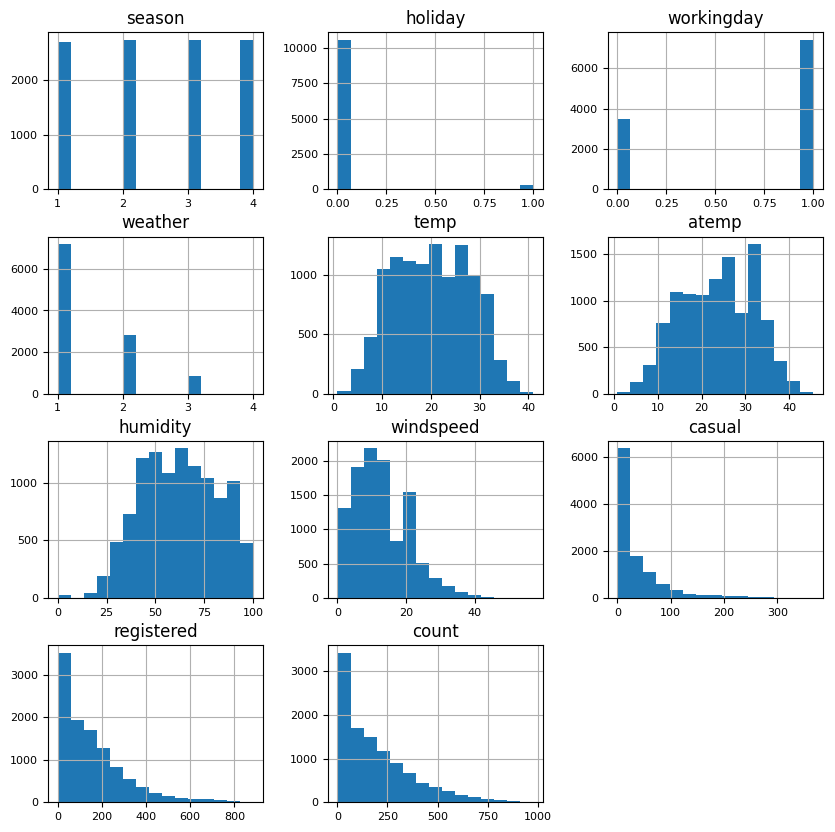

In [4]:
# Visuaçização de dados
# Grafico de distribuição em subplots
raw_data.hist(figsize=(10, 10), bins=15, xlabelsize=8, ylabelsize=8)
plt.show()

In [5]:
# Podemos perceber que a variável casual, registered e count não segue uma distribuição normal
# Talvez seja interessante fazer uma normalização dos dados
# Variaveis season e weather são categoricas, talvez seja interessante fazer uma one-hot encoding
# Variavel weather tbm é assimetrica, talvez tenha alguma sazonalidade, pois estamos olhando um periodo especifico do mês
# Variáveis possuem escalas diferentes, talvez seja interessante fazer uma normalização

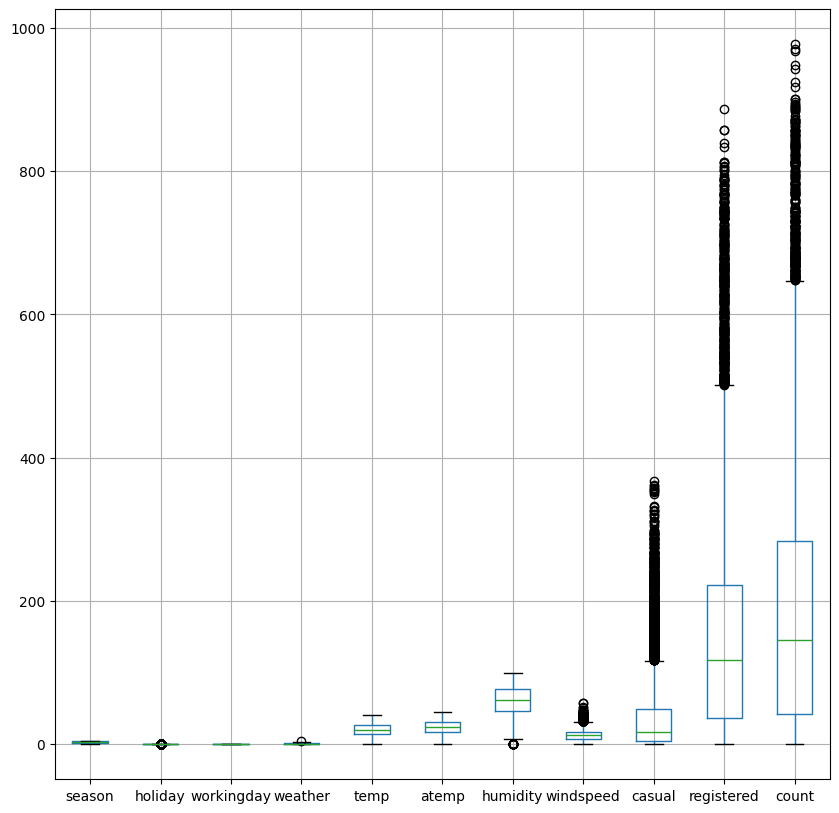

In [6]:
# Plota boxplot
raw_data.boxplot(figsize=(10, 10))
plt.show()

In [7]:
# Podemos perceber que a maioria dos usuarios são registrados
# em comparação com os usuários casuais
raw_data['proporcao_registered'] = raw_data['registered'] / raw_data['count']
raw_data['proporcao_casual'] = raw_data['casual'] / raw_data['count']

print(f'A média da proporção de usuarios registrados é: {raw_data['proporcao_registered'].mean().round(2)}')
print(f'A média da proporção de usuarios casuais é: {raw_data['proporcao_casual'].mean().round(2)}')

A média da proporção de usuarios registrados é: 0.83
A média da proporção de usuarios casuais é: 0.17


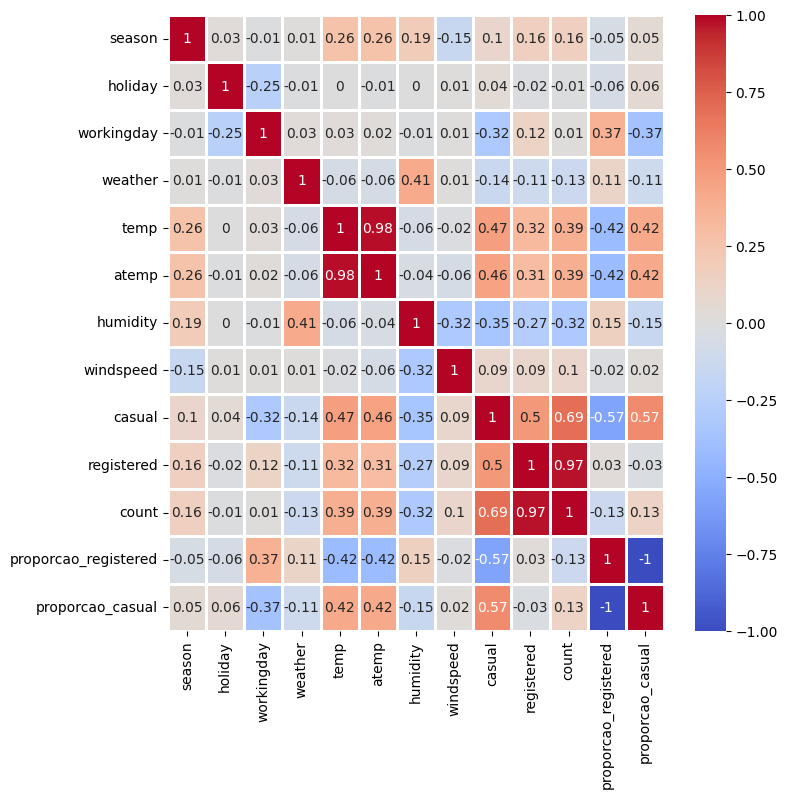

In [8]:
# Plota matrix de correlação
correlation_matrix = raw_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm', linewidths=2)
plt.show()

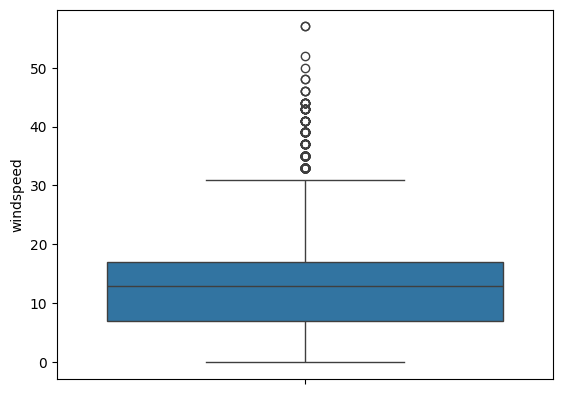

In [9]:
sns.boxplot(data=raw_data['windspeed'])
plt.show()

# Preparação dos dados

In [10]:
categorical_columns = ['season', 'weather', 'holiday', 'workingday']

for c in categorical_columns:
    print(raw_data[c].value_counts())

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
holiday
0    10575
1      311
Name: count, dtype: int64
workingday
1    7412
0    3474
Name: count, dtype: int64


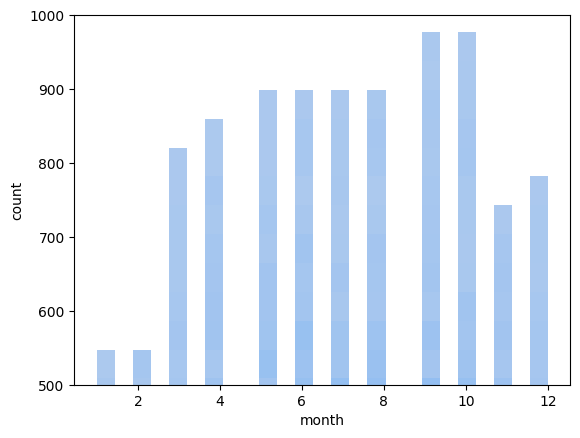

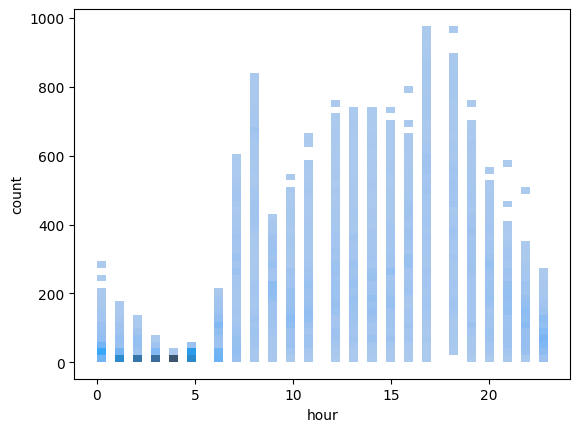

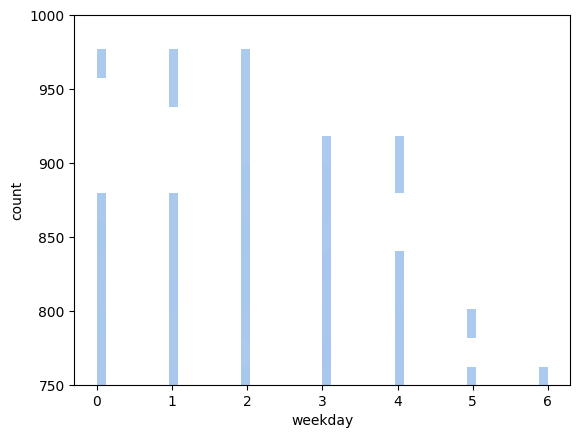

In [11]:
dataset = raw_data.reset_index()

# Provavelmente temos alguma sazonalidade de mes e hora
dataset['year'] = dataset['datetime'].dt.year
dataset['month'] = dataset['datetime'].dt.month
dataset['hour'] = dataset['datetime'].dt.hour
dataset['weekday'] = dataset['datetime'].dt.dayofweek

sns.histplot(dataset, x='month', y='count', bins=25)
plt.ylim(500, 1000)
plt.show()
sns.histplot(dataset, x='hour', y='count', bins=50)
plt.show()
sns.histplot(dataset, x='weekday', y='count', bins=50)
plt.ylim(750, 1000)
plt.show()

In [12]:
# Exclui outliers
#dataset = dataset[dataset['weather'] != 4]
#dataset = dataset[dataset['windspeed'] < 35]

# Aplica encoding
dataset['year'] = dataset['year'].replace({2011:0, 2012:1})
dataset = pd.get_dummies(dataset, columns=['season', 'weather', 'weekday'], drop_first=True)
dataset = dataset.rename(columns={'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})

# Exclui colunas que foram apenas para uma analise dos dados
dataset = dataset.drop(columns=['proporcao_registered', 'proporcao_casual']).set_index('datetime')

# Coluna atemp e temp possuem correlações muito altas, basicamente é a mesma informação nas duas colunas
dataset = dataset.drop(columns=['atemp'])
dataset.head()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,year,month,...,winter,weather_2,weather_3,weather_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,9.84,81,0.0,3,13,16,0,1,...,False,False,False,False,False,False,False,False,True,False
2011-01-01 01:00:00,0,0,9.02,80,0.0,8,32,40,0,1,...,False,False,False,False,False,False,False,False,True,False
2011-01-01 02:00:00,0,0,9.02,80,0.0,5,27,32,0,1,...,False,False,False,False,False,False,False,False,True,False
2011-01-01 03:00:00,0,0,9.84,75,0.0,3,10,13,0,1,...,False,False,False,False,False,False,False,False,True,False
2011-01-01 04:00:00,0,0,9.84,75,0.0,0,1,1,0,1,...,False,False,False,False,False,False,False,False,True,False


In [13]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=['count', 'casual', 'registered'])
y = dataset['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

## Scaling

In [14]:
# Padronização dos dados
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error, root_mean_squared_error, mean_absolute_percentage_error
# Cria o modelo de random forest
random_forest_model = RandomForestRegressor(n_estimators=250, criterion='squared_error', random_state=33)

# Treina o modelo
random_forest_model.fit(X_train_scaled, y_train)

previsoes_random_forest = random_forest_model.predict(X_test_scaled)

print(f'MAE treino: {mean_absolute_error(y_train, random_forest_model.predict(X_train_scaled))}')
print(f'MAE teste: {mean_absolute_error(y_test, previsoes_random_forest)}')
print()
print(f'RMSLE treino: {root_mean_squared_log_error(y_train, random_forest_model.predict(X_train_scaled))}')
print(f'RMSLE teste: {root_mean_squared_log_error(y_test, previsoes_random_forest)}')

df_previsoes_rf = pd.DataFrame({'y_test': y_test, 'y_test_predict': random_forest_model.predict(X_test_scaled)})
df_previsoes_rf.head()

MAE treino: 9.27255628868911
MAE teste: 24.6056433468888

RMSLE treino: 0.15130457079223703
RMSLE teste: 0.31730333117563314


,y_test,y_test_predict
datetime,,
2012-12-12 16:00:00,329,358.924
2011-07-17 05:00:00,12,6.340
2011-01-12 14:00:00,44,52.456
2011-03-02 09:00:00,148,149.956
2011-06-16 07:00:00,188,136.556


# Trata o dataset de submissão para ficar igual ao dataset de treino

In [19]:
submission_set = pd.read_csv('test.csv')
submission_set['datetime'] = pd.to_datetime(submission_set['datetime'])

#submission_set = submission_set[submission_set['weather'] != 4]

# Provavelmente temos alguma sazonalidade de mes e hora
submission_set['year'] = submission_set['datetime'].dt.year
submission_set['month'] = submission_set['datetime'].dt.month
submission_set['hour'] = submission_set['datetime'].dt.hour
submission_set['weekday'] = submission_set['datetime'].dt.dayofweek

submission_set = pd.get_dummies(submission_set, columns=['season', 'weather', 'weekday'], drop_first=True)
submission_set['year'] = submission_set['year'].replace({2011:0, 2012:1})
submission_set = submission_set.rename(columns={'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})
submission_set = submission_set.set_index('datetime').drop(columns=['atemp'])

submission_set_scaled = min_max_scaler.transform(submission_set)
submission_set_scaled

array([[0.        , 1.        , 0.25531915, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.25531915, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.25531915, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.25531915, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.25531915, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.25531915, ..., 0.        , 0.        ,
        0.        ]])

# Previsões - Dados de submissão

In [31]:
sample_sub = pd.read_csv('sampleSubmission.csv')
# Faz as previsões no dataset de submissao
previsoes_submissao = random_forest_model.predict(submission_set_scaled)
sample_sub['count'] = previsoes_submissao
sample_sub.set_index('datetime', inplace=True)
sample_sub

,count
datetime,
2011-01-20 00:00:00,12.352
2011-01-20 01:00:00,4.460
2011-01-20 02:00:00,3.580
2011-01-20 03:00:00,3.360
2011-01-20 04:00:00,2.980
...,...
2012-12-31 19:00:00,385.520
2012-12-31 20:00:00,236.204
2012-12-31 21:00:00,169.832


In [32]:
sample_sub.to_csv('sampleSubmission_predict.csv')